# Day 2: Dimensionality Reduction & Classifiers

### Set up the environment for this example (importing packages and configuring options)
ensure your librosa version (printed below next cell) is 0.7 <br>
otherwise use the following command  <br>
*conda install -c conda-forge librosa=0.7.0*

In [1]:
#import numpy
import numpy as np

#import librosa and display the library verion installed in yoru system
import librosa, librosa.display
print(librosa.__version__)

#import matplotlib 
import matplotlib.pyplot as plt

# Render plots interactively in the notebook (not a must)
#alternatively use matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib inline

#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use('seaborn-muted')

#importing audio widget from IPython.display for audio playback
from IPython.display import Audio

#import scipy or scientific python
import scipy

#import os (helps retrieve the file names from the directory structure on your computer, and much more)
import os

import IPython.display as ipd

#iimport scikit-learn
import sklearn

#importing pandas for being able to load data from files such as comma separated values files
import pandas as pd

#import pathlib to easily write a function to work on all the files in a folder
from pathlib import Path


0.7.0


### Creating a dataset including features from raw data.

When working with ML we usually handle large amount of files. Handling them individually is not an option. Learning how to handle them via programming (using dedicated packages) is the most efficient way.
In the ./Data/drum_sample foler there are 84 .wav files. 42 contains an acoustic or synthetic kick drum (0 to 41), the remaining 42 contains an acoustic or synthetic snare drum (0 to 41).

We will use this dataset for today's examples on dimensionality reduction and classification via ML (i.e. recognizing whether a sound is a snare or a kick). Mind that this dataset has an equal number of sample in each class (and you should always aim for this, minor variations are fine, e.g. 5-10%).

The raw data is organized in a way that the label (i.e. snare or drum) can be derived from the filename. This is a very handy way of handling data in supervised learning.

The code below loads all samples and computes a set of scalar features (using librosa) for all files, and store these into a handy Pandas data structure.

You can use a similar approach with any kind of data your are loading from files.

The code below uses several functions from packages that may be new to you. Please refer to the official documentaton for further details.

In [2]:
#The next line of code includes an inline for loop 
#which will load all .mp3 samples starting with kick into kick_signals.
#The * star is also called wildcard, the librosa.load will be performed on all files which name starts
#with kick and ends with .wav (e.g. kick_03.wav, but also kick_adsugds.wav which we do not have in the folder).
#Mind that the sampling rate is the default one (do you remember the value?).
#The code below will actually create a LIST (squared brackets in Python) of Numpy arrays.
#Te have to take this approach because we are not sure that if files have the same number of samples (they do not)
#othrwise we could use a matrix (aka N dimensional Numpy array).
kick_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/kick*.wav') ]


#Repeating the same for snare samples
snare_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/snare*.wav') ]

#Printing the size (lenght, using len() ) of the lists which includes kick and snares (separately).
#Does the number make sense versus what you have in the drum_samples folder?
print(len(kick_signals))
print(len(snare_signals))

42
42


In [123]:
#Instead of writing the code to extract the features we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#All features (5 of them) are from librosa and are all scalar (we take the mean over multiple blocks).
#We have to do this (use average) because we did not check if all files have the same lenght (actually they are different).
#Different file lenght generates Numpy arrays of different lenght (not comparable)
#The function returns a list containing the mean of the features on "signal", which is the parameter we pass to the function
#Mind that these features may not be the best to perform the classification task (it's just an example!)
def extract_features(signal):

    return [
        np.mean(librosa.feature.zero_crossing_rate(signal)),
        np.mean(librosa.feature.spectral_centroid(signal)),
        np.mean(librosa.feature.spectral_contrast(signal)),
        np.mean(librosa.feature.rms(signal)),
        np.mean(librosa.feature.spectral_flatness(signal)),
    ]


#Extracting our the 5 scalar features for all kick samples.
#Ee are using another inline for loop (this is very convenient when working with lists).
#Now we can store the data on an Numpy array because the size of the data is consistent,
#indeed we will have 5 numbers (features) per sample
#to be precise, we are still storing data into a list [], and then we use the function np.array
#to convert the list into an array (we need Numpy arrays for our ML algorithm, not lists)
kick_features = np.array([extract_features(x) for x in kick_signals])

#Repearing the same for the snare samples.
snare_features = np.array([extract_features(x) for x in snare_signals])

#Displaying the size of the Numpy arrays (this time we use the .shape attribute)
#Check if the printed numbers are the expected ones (what's on the rows and what's on the columns?)
print('Size of Numpy arrays for kick and snare features')
print(kick_features.shape, snare_features.shape)

#Now we create an array of labels, we can use zeros for the kicks and ones for the snare (or any other number).
#This will help us to discriminate set of featires associated with kicks and snares
#We can opt for "text" labels but this is not convenient,
#It wont work well with neural networks, and we put "text" labels in Numpy arrays

#Create a row of zeroes as long as the number of kick samples
kicklabels = np.zeros(kick_features.shape[0])

#Create a row of ones as long as the number of snare samples
snarelabels = np.ones(snare_features.shape[0])

#Now we concatenate (attach) the numeric labels into a single array,
#and we also concatenate the two set of features
labels = np.concatenate((kicklabels,snarelabels))
features = np.concatenate((kick_features,snare_features))

#check the output and reconsile these with what we just did
print('Size of labels array',labels.shape)
print('Size of feature array',features.shape)

#Here we use the scale function of scikit-learn to scale the features,
#this is important when using hetherogeneous (different) scalar features.
#After this step all features will present zero mean and unit veriance (i.e. they are more comparable).
#It is way less recommended to do this with vectorial features.
#In this case we are overwiting the previous Numpy variable (or array) instead of creating a new one
#(it is fine if you do not need the old data anymore, and it reduces the number of variables you use in a program)
features = sklearn.preprocessing.scale(features)




#Moving the data into a Pandas structure and we assign name to each column (features are on column)
dataset = pd.DataFrame(features)
dataset.columns = ['ZC','SpecCen','SpecCon','RMS','SpecFlat']

#Sticking an extra colum as labels
dataset['Label'] = labels

#this will display the Pandas data structure
dataset


Size of Numpy arrays for kick and snare features
(42, 5) (42, 5)
Size of labels array (84,)
Size of feature array (84, 5)


,ZC,SpecCen,SpecCon,RMS,SpecFlat,Label
0,-0.883163,-1.105849,-0.131371,-0.673614,0.969022,0.0
1,-0.771697,-0.662244,-0.625716,-0.689075,1.139487,0.0
2,-0.924104,-0.912199,0.380060,-0.803241,0.686154,0.0
3,-0.898136,-1.065562,-0.585951,-0.001712,0.826101,0.0
4,-0.979839,-1.230486,1.254674,2.752213,0.374972,0.0
5,-0.826071,-0.992743,-0.348271,-0.411926,1.527120,0.0
6,-0.891665,-0.846313,0.030214,-0.713811,0.549845,0.0
7,-0.904746,-0.840262,-0.679880,-0.782656,0.516953,0.0
8,-1.022463,-1.229509,-0.038382,-0.530305,0.921020,0.0
9,-0.909227,-0.735473,-0.612924,-0.801950,0.517859,0.0


### Exercise 1
a) Modify the code above (copy and paste it in the cell below) in order to add another scalar feature of your choice to the feature set (this will require modifcation in different points fo your program)

b) Try to display on screen feature instead of dataset (i.e. a Numpy data structure vs a Pandas data structure). Which one is more readable?

c) Pandas data structure are very handy because can be saved and loaded from files (you can load your samples only once, compute the features, and store them in a file, because it's time consuming, then you can try different ML options just by reloading the pandas data sructure from a file). Try to write and read to/from file as CSV format usint [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [ ]:
#write your code here

### Principal Component Analysis

Principal component analysis (PCA) is a procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components. 
The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

In the example below we keep 95% of the variance, and we use the [PCA in scikit-learn](https://scikit-learn.org/stable/modules/decomposition.html#pca)

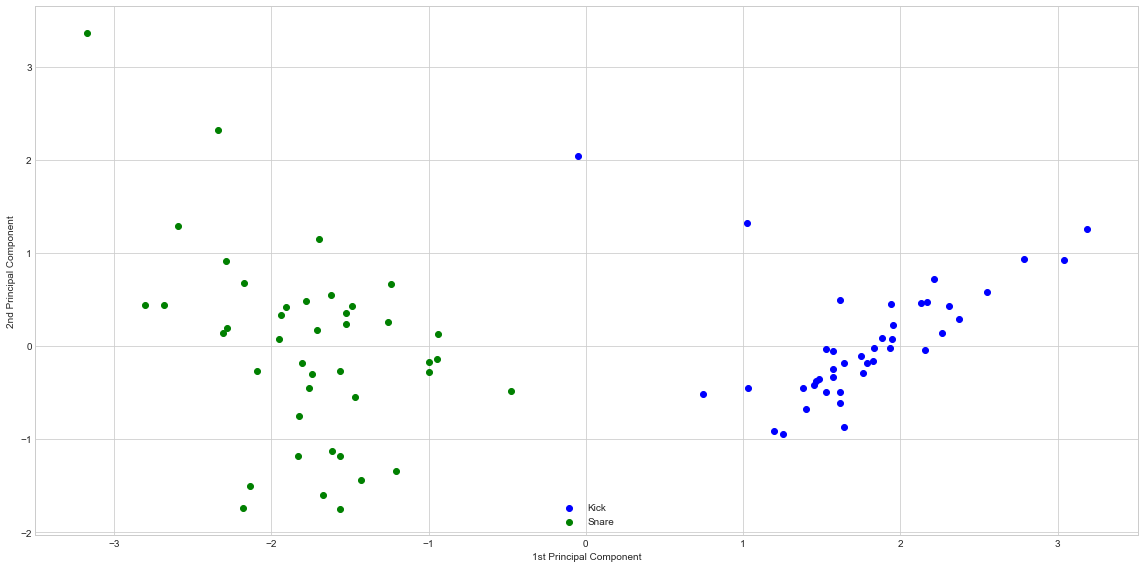

In [124]:
#Creating an instance of a PCA object, which is an object capable of learning and applying PCA from/to data.
#We instruct the PCA to keep only 2 components
pca = sklearn.decomposition.PCA(n_components=2)

#This will learn PCA projection from data.
#mind that we are using the Numpy data structure (without labels!!!!!)
pca.fit(features)

#Now we project the data into a from a 7D to a 2D space,
#you can do this again and again on NEW data (e.g. test data, while PCA projection was learnt from training data)
projected_features_pca = pca.transform(features)

#Plot the distribution of the data according to the first two principle components
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8))
    for lab, col in zip(('Kick','Snare'),
                        ('blue', 'green')):
        plt.scatter(projected_features_pca[y==lab, 0],
                    projected_features_pca[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('1st Principal Component')
    plt.ylabel('2nd Principal Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

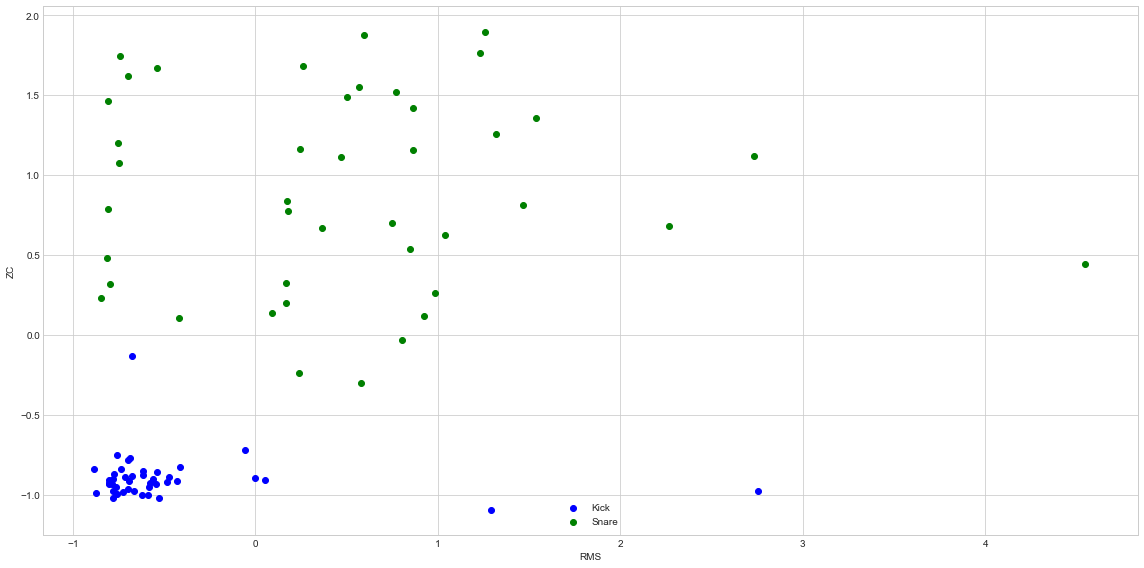

In [127]:
#Plotting the features before projection (you should try different combinations)
#by changing the feature names at lines 16 and 17 (select1 and select2)

#we also include an histrogram (different view of the same data)

#Create a dictionary of features so that we can toggle between indexes and labels for each individual feature
feature_dict = {'ZC':0,
                'SpecCen':1,
                'SpecCon':2,
                'RMS':3,
                'SpecFlat':4}

select1 = 'RMS'
select2 = 'ZC'

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8))
    for lab, col in zip(('Kick','Snare'),
                        ('blue', 'green')):
        plt.scatter(features[y==lab, feature_dict[select1]],
                    features[y==lab, feature_dict[select2]],
                    label=lab,
                    c=col)
    plt.xlabel(select1)
    plt.ylabel(select2)
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### Exercise 2
a) Reflect on the scatter plots displayed above, and test to plot (last one) using different features (change select1 and select2). Does the feature of the differen classes (kick and snare) appears to be separable or not (both before and after PCA).

b) in the example above we decided to keep only 2 principal components (easier to display on screen). Remove "n_components=2". Now the PCA projection wil have as many components as the original data. Add to the code "print(pca.explained_variance_ratio_)", this will show you the variance of each component. Can you work out (by inspection or (better) by coding how many principal coponents accounts for 90% of the total variance?


In [ ]:
#write your code here

### Linear Discriminant Analysis
When using labeled data (supervised) LDA may provide better perfrmances than PCA (i.e. better separation).
In the example below we use LDA in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

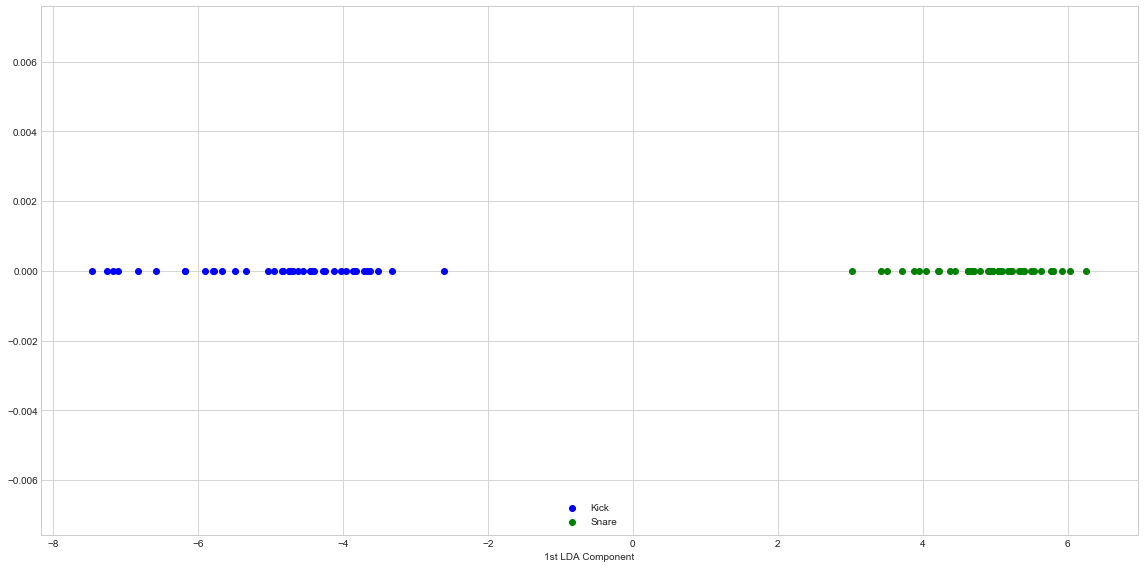

In [128]:
#Creating an instance of the LDA obhect, which is an object capable of learning and applying LDA from/to data.
#We instruct the LDA to keep only 2 components
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

#This will learn LDA projection from data.
#LDA needs features and labels (as numbers)
lda.fit(features, labels)


#Now we project the data into a from a 7D to a 1D space,
#indeed in scikit-learn, LDA transform the data to a number of dimensions
#equal to min(n_classes - 1, n_features), which in our case is 2 classes -1 = 1.
#with more classess we will have more dimensions at the output of LDA projection
#you can do this again and again on NEW data (e.g. test data, while LDA projection was learnt from training data)
projected_features_lda = lda.transform(features)

#Since we have only 1 dimension we plot all points on along a line (the value on the 
#vertical axis is zero)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8))
    for lab, col in zip(('Kick','Snare'),
                        ('blue', 'green')):
        plt.scatter(projected_features_lda[y==lab, 0],
                    np.zeros(np.size(projected_features_lda[y==lab, 0])), #create an array of zero for the vert. axis
                    label=lab,
                    c=col)
    plt.xlabel('1st LDA Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


### Exercise 3
Compare the result of LDA against the result of PCA. For a fair comparison, you can just look at the 1st Principal Component, and plot it in the same way we just plotted the LDA projection, i.e. with zero values for the vertical axis)

In [ ]:
#write your code here

### Classifiers
In the examples below we use [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [KNN](https://scikit-learn.org/stable/modules/neighbors.html), and [SVN](https://scikit-learn.org/stable/modules/svm.html) from scikit-learn to classify the features exctracted from the kick and snare samples (the task is already quite simple, so we wont apply PCA or LDA, but you will do this later as an excercise).

In [170]:
#Before proceeding with training and testing of the classifiers
#we split the data in training and testing set using a 70/30 partitioning.
#This is done a useful function in scikit-learn (called train_test_split)
#The partitioning is done randomly but starting from a seed you can specify (random_state)
#Every time you change the starting random state value, you will experience
#a different partitioning and (likely) a different classification result.

#Importing the tool,
#alternatively you can call sklearn.model_selection.train_test_split(..,..,..,)
#but that will be too long
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.3, random_state=14)

In [163]:
#creating an instance of a Gaussian Naive Bayes classifier
model_GNB = sklearn.naive_bayes.GaussianNB()

#training the model
model_GNB.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict =  model_GNB.predict(feat_test)


#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))

Number of mislabeled samples 0 out of 42
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        23

   micro avg       1.00      1.00      1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [164]:
#Creating an instance of a KNN classifier
#and setting it to classify according to only 1 nearest neighbor
model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)

#training the model
model_KNN.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict =  model_KNN.predict(feat_test)


#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))

Number of mislabeled samples 0 out of 42
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        26

   micro avg       1.00      1.00      1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [169]:
#Creating an instance of a SVN classifier
#and setting it to use a linear kernel
model_SVN = sklearn.svm.SVC(kernel='linear')

#training the model
model_SVN.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict =  model_SVN.predict(feat_test)


#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))

Number of mislabeled samples 0 out of 42
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        26

   micro avg       1.00      1.00      1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



### Exercise 4
a) The results of the classifier is pretty good, as the task that we set in this example was fairly simple.
To get worst results (just for the sake of getting familiar with the classification report) you can try to significantly increase the test set (go from 70/30 to 30/70 or 20/80) and/or add some noise to the features.
To add noise replace the following line of code

... = train_test_split(features, labels, test_size=0.5, random_state=14)

with

... = train_test_split(features + 10*np.random.rand(features.shape[0], features.shape[1]), labels, test_size=0.5, random_state=14)

where the 10 represent the amount of noise (use numbers in the range 1 to 20)


b) Try to change settings of the classifiers, such as the number of neighbors used in KNN and the kernel of SVM (refer to the official documentation).

c) Try to use PCA or LDA dimensionality reduction before using the classifier. Mind that in the earlier examples we used the entire dataset to learn the dimensionality reduction (i.t. the function fit()), which is not a fair approach. You should learn the dimensionality reduction only by using the training set, and then use it to project (i.e. transform()) both training anr test data.

In [ ]:
# Write your code here